# **Mall Customers Segmentation and Clustering**

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import CSV local file
df = pd.read_csv('D:/Projects/5-MallCostumersAnalysis/Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


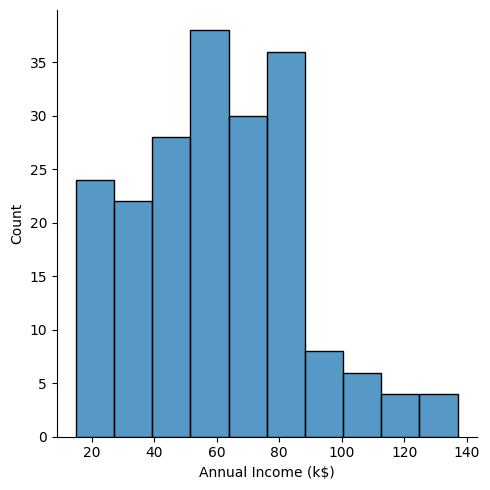

In [5]:
sns.displot(df['Annual Income (k$)'])

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

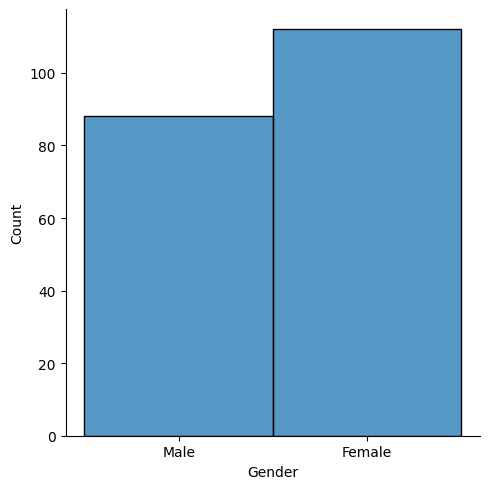

<Figure size 640x480 with 0 Axes>

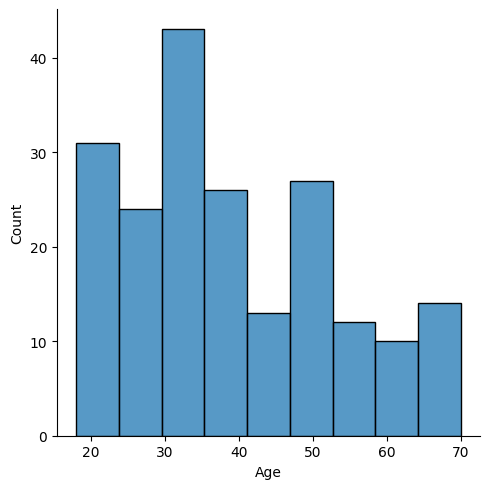

<Figure size 640x480 with 0 Axes>

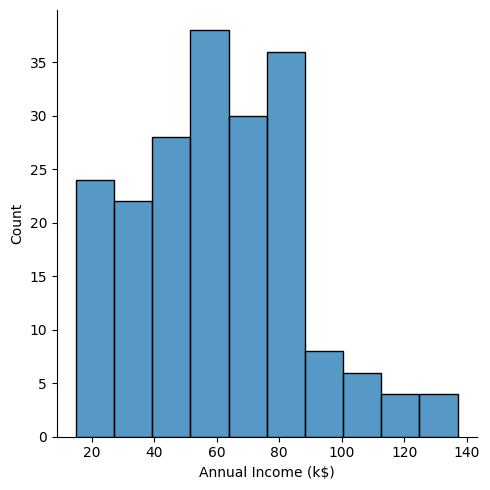

<Figure size 640x480 with 0 Axes>

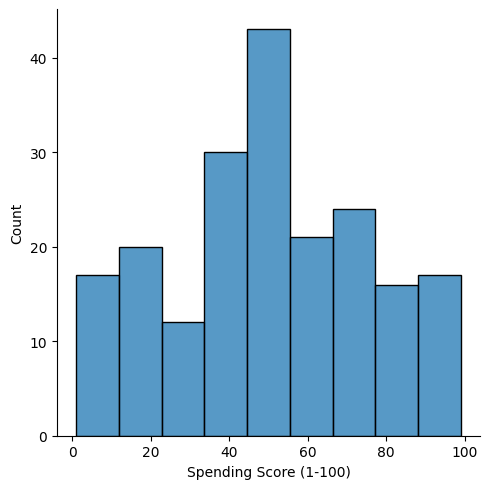

In [7]:
columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

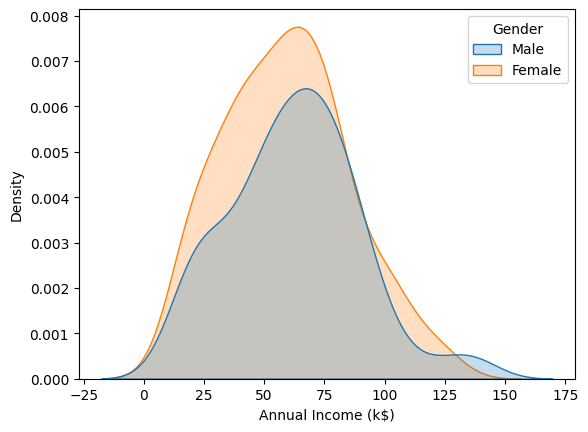

In [8]:
sns.kdeplot(data=df,x='Annual Income (k$)', shade= True, hue='Gender')

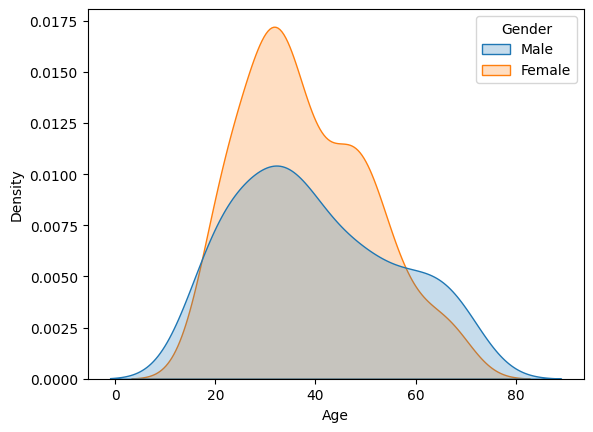

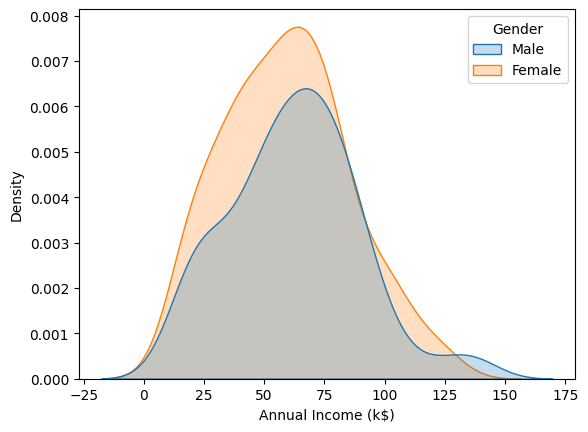

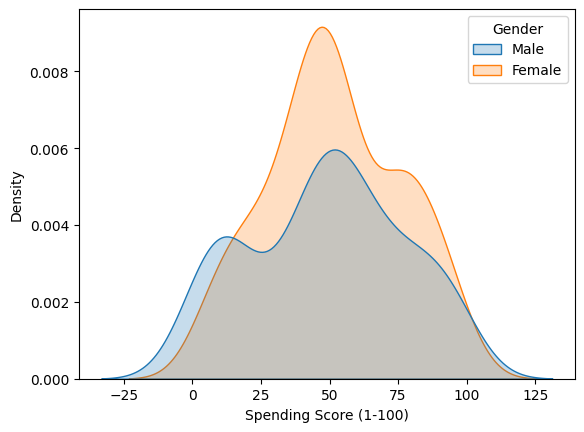

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x= i, shade= True, hue='Gender')

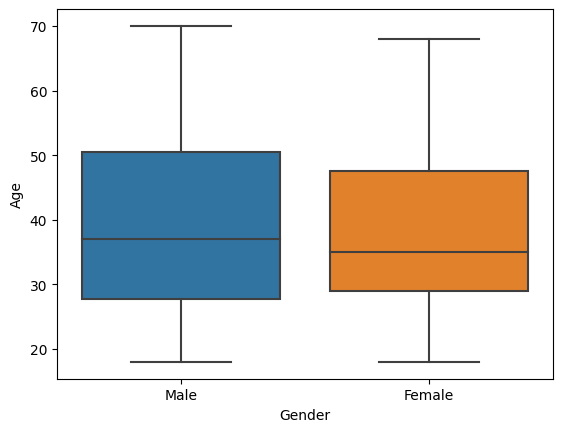

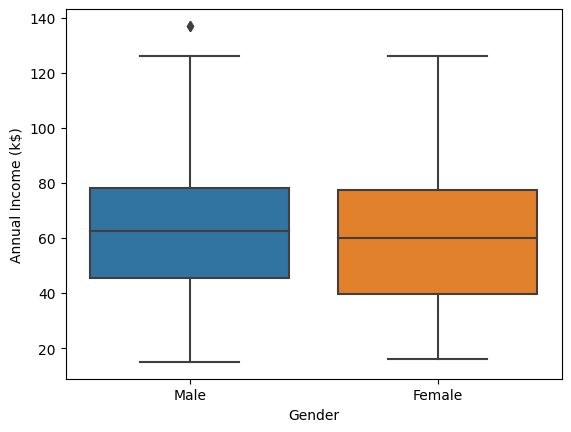

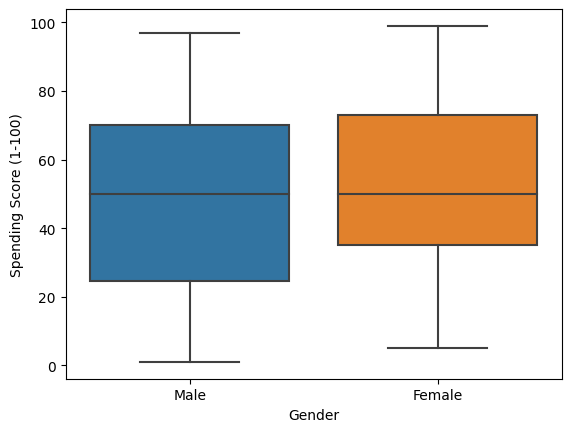

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x= 'Gender', y= df[i])

In [11]:
#Normalize to show percentage
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

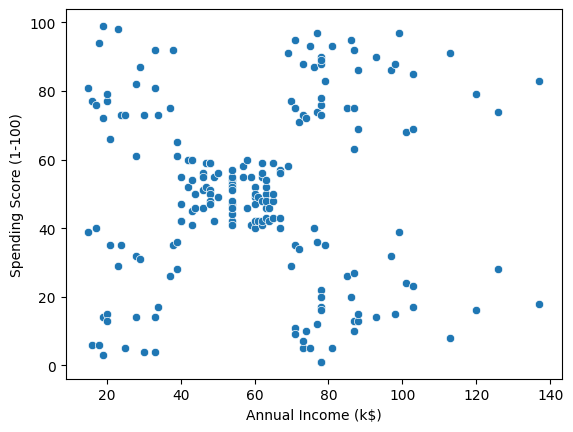

In [12]:
sns.scatterplot(data= df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)')

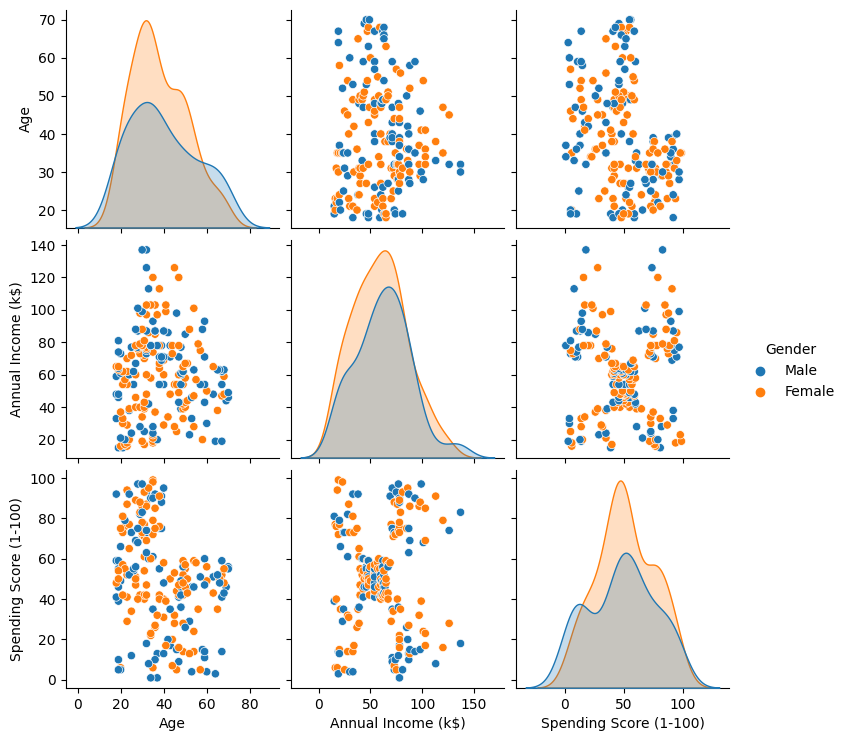

In [13]:
df1 = df.drop('CustomerID', axis=1)
sns.pairplot(df1, hue='Gender')

In [14]:
df1.groupby(['Gender']).mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
#Correlation just for numeric columns
df1.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [16]:
# Correlation with customized background
df1.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

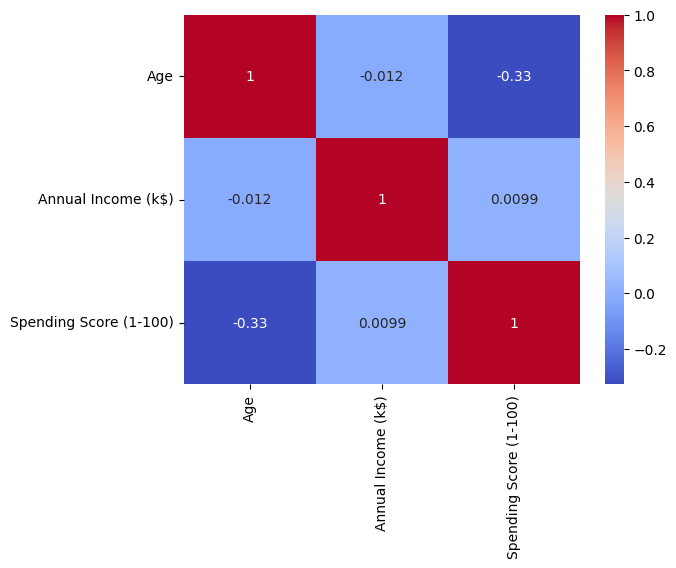

In [17]:
# Correlation showed as a seaborn visualization
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm')

## **Clustering**

### Univariate

In [18]:
clustering1 = KMeans(n_clusters=6)

In [19]:
clustering1.fit(df1[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [20]:
clustering1.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
#Adding cluster labels into income cluster column
df1['Income Cluster'] = clustering1.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,5
1,Male,21,15,81,5
2,Female,20,16,6,5
3,Female,23,16,77,5
4,Female,31,17,40,5


In [22]:
df1['Income Cluster'].value_counts()

Income Cluster
0    46
4    44
1    42
5    32
3    28
2     8
Name: count, dtype: int64

In [23]:
#Inertia represents the distance between centroids
clustering1.inertia_

5081.484660267269

In [24]:
# Validate inertia depending on the number of clusters (between 1 and 11) using the Elbow method

inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [25]:
inertia_scores

[137277.28000000003,
 48660.88888888888,
 23517.330930930926,
 13278.112713472488,
 8481.496190476191,
 5050.9047619047615,
 3931.9880952380954,
 2827.308424908425,
 2168.4787157287155,
 1852.435273790537]

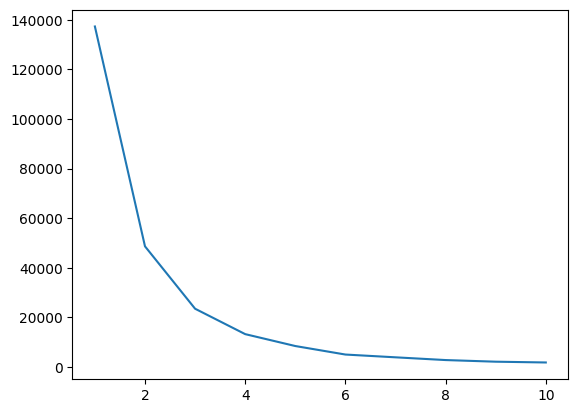

In [26]:
plt.plot(range(1,11), inertia_scores)

In [27]:
# The best number of cluster is 3

clustering1 = KMeans(n_clusters=3)

In [28]:
clustering1.fit(df1[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [29]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [30]:
df1['Income Cluster'] = clustering1.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [31]:
df1.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,38.930556,33.027778,50.166667
2,39.184783,66.717391,50.054348


### Bivariate Analysis

In [32]:
clustering2 = KMeans()
clustering2.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df1['Spending and Income Cluster'] = clustering2.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,5
1,Male,21,15,81,1,4
2,Female,20,16,6,1,5
3,Female,23,16,77,1,4
4,Female,31,17,40,1,5


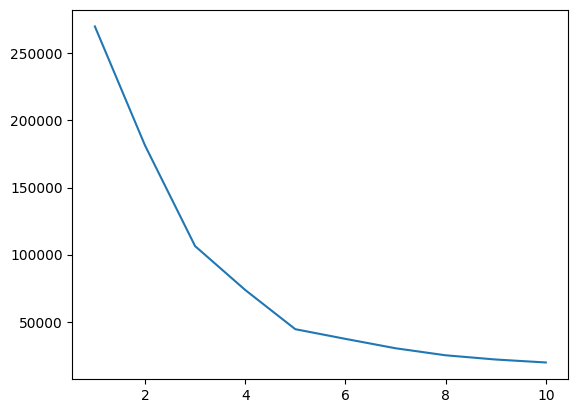

In [33]:
inertia_scores2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertia_scores2)

In [34]:
# The best number of clusters is 5

clustering2 = KMeans(n_clusters=5)
clustering2.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df1['Spending and Income Cluster'] = clustering2.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,3
2,Female,20,16,6,1,0
3,Female,23,16,77,1,3
4,Female,31,17,40,1,0


In [35]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = [ 'x', 'y']

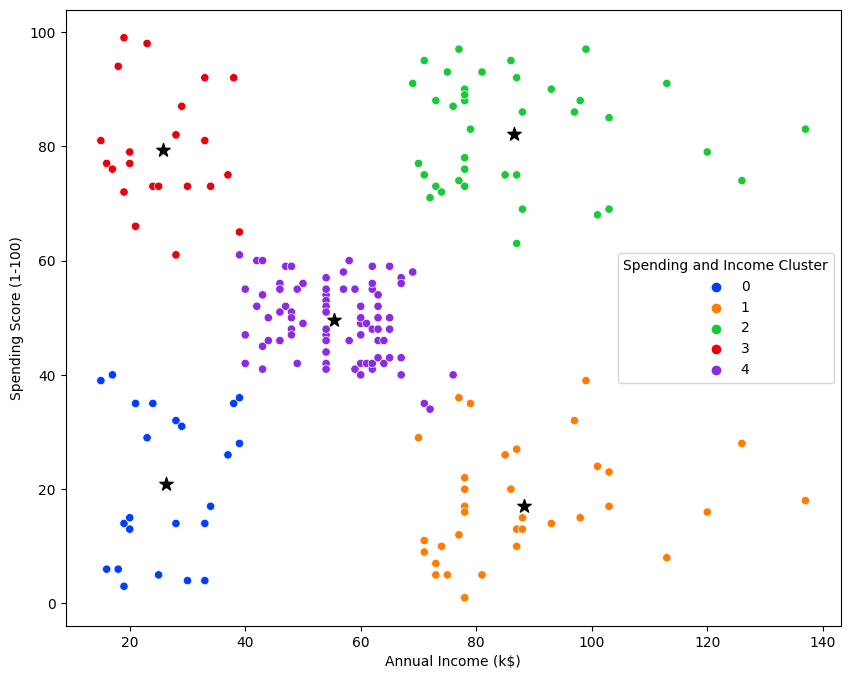

In [65]:
# Visualize using scatter plot
plt.figure(figsize=(10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker= '*')
sns.scatterplot(data = df1, x = 'Annual Income (k$)', y ='Spending Score (1-100)', hue = 'Spending and Income Cluster', palette='bright')
plt.savefig('clustering_bivariate.png')

In [37]:
pd.crosstab(df1['Spending and Income Cluster'], df1['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.457143,0.542857
2,0.538462,0.461538
3,0.590909,0.409091
4,0.592593,0.407407


In [38]:
df1.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


### Multivariate Clustering

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scale = StandardScaler()

In [41]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,3
2,Female,20,16,6,1,0
3,Female,23,16,77,1,3
4,Female,31,17,40,1,0


In [45]:
# Replace categorical values tu numeric values

# Changing column values
#df1['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

# Using get_dummies function
df2 = pd.get_dummies(df1, drop_first= True, dtype='int64')
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,0,1
1,21,15,81,1,3,1
2,20,16,6,1,0,0
3,23,16,77,1,3,0
4,31,17,40,1,0,0


In [50]:
#Dropping clustering columns
#df2.columns

df2 = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [60]:
# Rename comlumns

df2.rename(columns = {'Gender_Male':'Gender'}, inplace= True)

In [74]:
# Scaling the data

df2 = pd.DataFrame(scale.fit_transform(df2))
df2.rename(columns = {0:'Age', 1:'Annual Income (k$)', 2:'Spending Score (1-100)', 3:'Gender'}, inplace= True)
df2

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


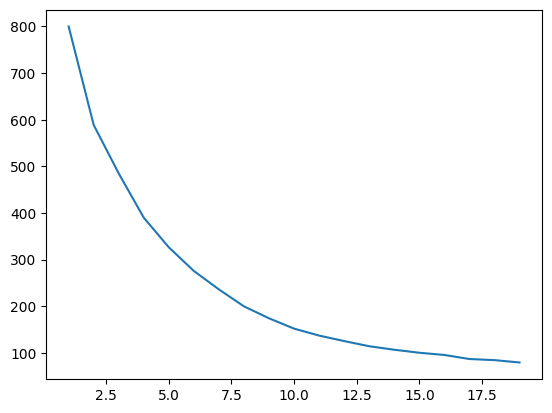

In [76]:
# Elbow method
inertia_scores3 = []

for i in range(1,20):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(df2)
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1,20), inertia_scores3)

In [89]:
clustering3 = KMeans(n_clusters=8)
clustering3.fit(df2[['Age','Annual Income (k$)', 'Spending Score (1-100)', 'Gender']])
clustering3.labels_
df2['Multi Cluster'] = clustering2.labels_
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Multi Cluster
0,-1.424569,-1.738999,-0.434801,1.128152,0
1,-1.281035,-1.738999,1.195704,1.128152,3
2,-1.352802,-1.700830,-1.715913,-0.886405,0
3,-1.137502,-1.700830,1.040418,-0.886405,3
4,-0.563369,-1.662660,-0.395980,-0.886405,0


In [83]:
#centers2 = pd.DataFrame(clustering3.cluster_centers_)
#centers2.columns = [ 'x', 'y', 'z']

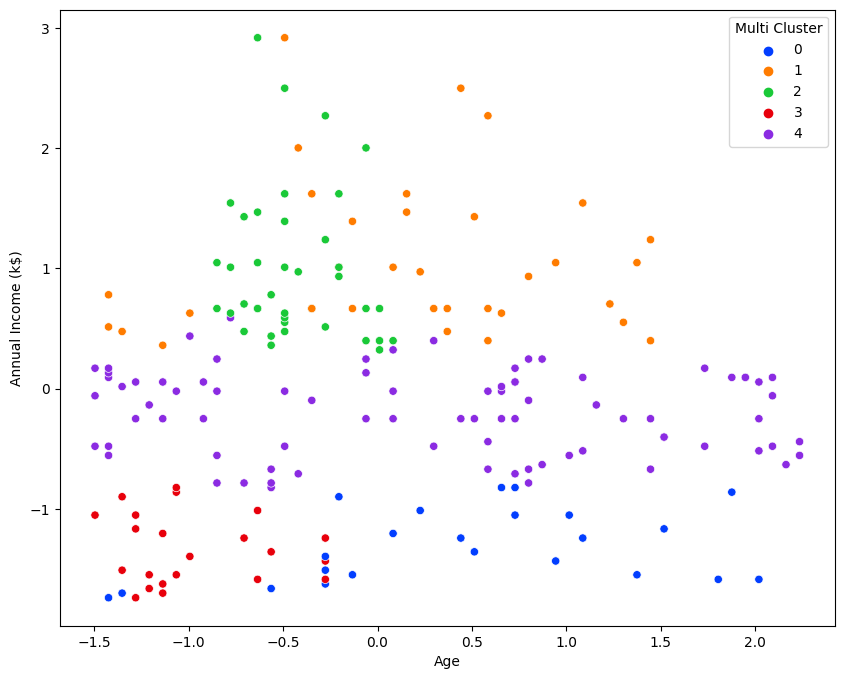

In [92]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df2, x = 'Age', y ='Annual Income (k$)',  hue = 'Multi Cluster', palette='bright')
plt.savefig('clustering_multi.png')